# Titanic Dataset: ML Introduction

Welcome to the ML Introduction notebook! In this notebook, you will train you first ml model! :)

Let's get started!

# Recomandation
install the extension Data Wrangler

Info:
https://code.visualstudio.com/docs/datascience/data-wrangler


In [28]:
# install packages if not done already 
# ! means the command goes to the terminal
# !pip install pandas numpy matplotlib seaborn scikit-learn  

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

## 7 Steps of creating a Machine Learning Model
1. Load and understand the Data: Inspect, explore, and understand the features.
2. Split Data: Create training and testing datasets.
3. Handle Missing Data: Drop or impute missing values.
4. Feature Engineering: Transform, create, or encode new features.
5. Handle Outliers: Detect and handle extreme values.
6. Train the Model: Fit the model to the training data.
7. Evaluate the Model: Test the model and evaluate its performance.

In [30]:
# 1. Understand the Data: Inspect, explore, and understand the features.

df = pd.read_csv('titanic.csv')

# See last class for data discovery

In [31]:
# 2. Split Data: Create training and testing datasets.
target_variable = 'Survived'
#X = df[['Pclass', 'Fare',  'SibSp', 'Parch']]
X = df[['Pclass', 'Age', 'Fare',  'SibSp', 'Parch',  'Sex',  'Embarked']]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # seed=42


In [32]:
# 3. Handle Missing Data: Drop or impute missing values.


## Column age has missing Values. Impute them with the median
Age_median = X_train['Age'].median()
X_train['Age'] = X_train['Age'].fillna(Age_median)
X_test['Age'] = X_test['Age'].fillna(Age_median)

## 3.1 Check if missing data exists
print("Observations with Not A Number ")
for column in X_train.columns:
    print(column,": ",X_train[column].isna().sum())    



Observations with Not A Number 
Pclass :  0
Age :  0
Fare :  0
SibSp :  0
Parch :  0
Sex :  0
Embarked :  2


In [33]:
# 4. Feature Engineering: Transform, create, or encode new features.
## create new features
# X_train['Family_size'] = X_train['SibSp'] + df['Parch'] + 1
# X_test['Family_size'] = X_test['SibSp'] + df['Parch'] + 1


# X_train['Is_alone'] = X_train['Family_size'].apply(lambda x: 1 if x == 1 else 0)
# X_test['Is_alone'] = X_test['Family_size'].apply(lambda x: 1 if x == 1 else 0)


# ## lets convert categorial variables into true false statements so we dont lose the information
X_train = pd.get_dummies(X_train, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)



In [34]:
# 5. Handle Outliers: Detect and handle extreme values.
# Clip the 'Fare' column to remove outliers using IQR
Q1 = X_train['Fare'].quantile(0.25)
Q3 = X_train['Fare'].quantile(0.75)
IQR = Q3 - Q1

X_train['Fare'] = X_train['Fare'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
X_test['Fare'] = X_test['Fare'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)

In [35]:
# 6. Train the Model: Fit the model to the training data.
model = LogisticRegression(random_state=42, max_iter = 1000000,C=11,tol=0.0001)
model.fit(X_train, y_train)


LogisticRegression(C=11, max_iter=1000000, random_state=42)

Quality of model measured by f1_score: 74.65%            # higher is better


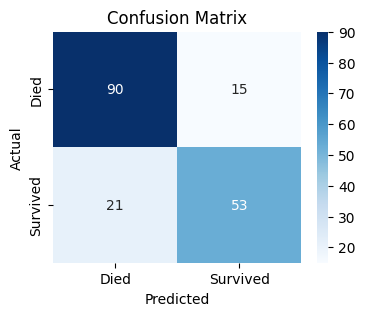

In [36]:
# 6. Evaluate the Model: Test the model and evaluate its performance.
y_pred = model.predict(X_test)
score = f1_score(y_test, y_pred)
print(f'Quality of model measured by f1_score: {score * 100:.2f}%            # higher is better')

# Confusion Matrix
plt.figure(figsize=(4, 3))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
y_pred_train = model.predict(X_train)
score_train = f1_score(y_train, y_pred_train)
print(f'Quality of model measured by f1_score: {score_train * 100:.2f}%            # higher is better')


Quality of model measured by f1_score: 73.02%            # higher is better


In [38]:
# if you want you can try to do the same with this data:
import seaborn as sns
df_iris = sns.load_dataset('iris')

df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


57.81 # max_iter = 10; 
61.07 # max_iter = 1000; 

73.76% # with addidtion categorial variables